In [1]:
# Подключение нужных библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('bmh')

In [2]:
# Загрузка!pip install kaggle
!pip install kaggle
!pip install fsspec
#!/bin/bash
!kaggle datasets download surajjha101/cuisine-rating


import zipfile

with zipfile.ZipFile("cuisine-rating.zip", 'r') as zip_ref:
    zip_ref.extractall("C://MyLive")


Dataset URL: https://www.kaggle.com/datasets/surajjha101/cuisine-rating
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/2.67k [00:00<?, ?B/s]
100%|██████████| 2.67k/2.67k [00:00<00:00, 2.59MB/s]


In [3]:
df = pd.read_csv('C://MyLive/Cuisine_rating.csv')

In [4]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [6]:
df.describe()


,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
for category in df.select_dtypes(include=['object', 'category']).columns:
    print(df[category].unique())

['Upper East Side,NY' 'St. George,NY' 'Upper West Side,NY'
 'Central Park,NY' 'China Town, NY' 'Riverdale,NY' 'Market City, NY'
 'Central Park,ny' 'Market City, MY' 'Cedar Hill, NY']
['Female' 'Male']
['Single' 'Married' 'Divorced']
['Professional' 'Student']
['Japanese' 'Indian' 'Seafood' 'Filipino' 'Italian' 'Chinese' 'French']
['Never' 'Often' 'Socially']
['Never' 'Socially' 'Often']
['No' 'Yes']


In [8]:

# Замена значений с помощью replace
df['Location'] = df['Location'].replace({'Central Park,ny': 'Central Park,NY'})

print(df['Location'].unique())


['Upper East Side,NY' 'St. George,NY' 'Upper West Side,NY'
 'Central Park,NY' 'China Town, NY' 'Riverdale,NY' 'Market City, NY'
 'Market City, MY' 'Cedar Hill, NY']


Text(0.5, 1.0, 'Возможные типы кухни(в процентах)')

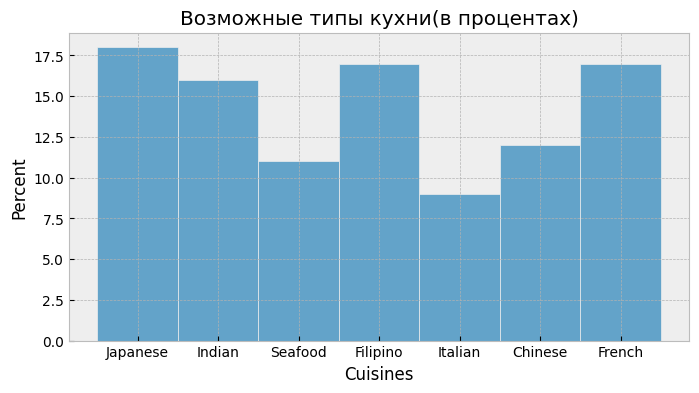

In [9]:
#Посмотрим, какая кухня является самой популярной
plt.figure(figsize=(8,4))
sns.histplot(data = df, x = 'Cuisines', stat = 'percent')
plt.title('Возможные типы кухни(в процентах)', )

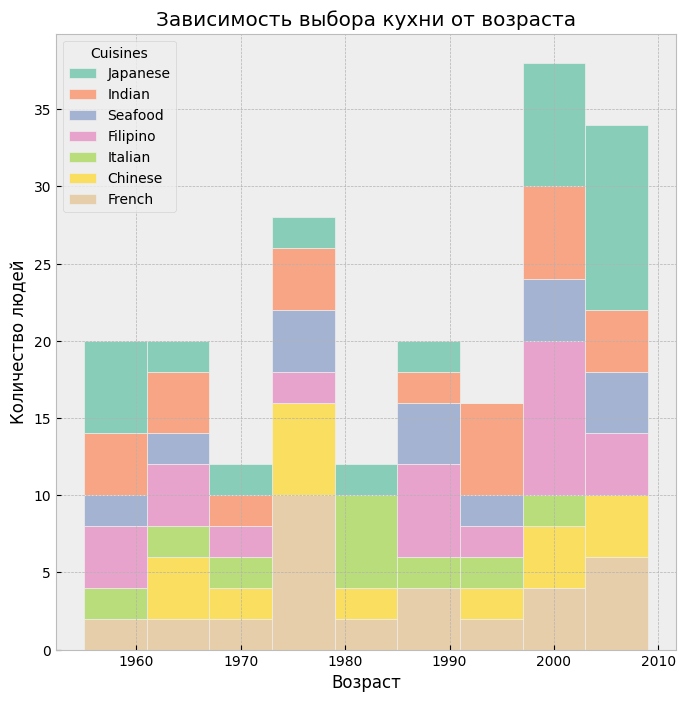

In [10]:
plt.figure(figsize=(8,8))
sns.histplot(data=df, x = 'YOB', hue = 'Cuisines', multiple='stack', kde=False, palette = 'Set2', legend='True')
plt.title('Зависимость выбора кухни от возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.show()

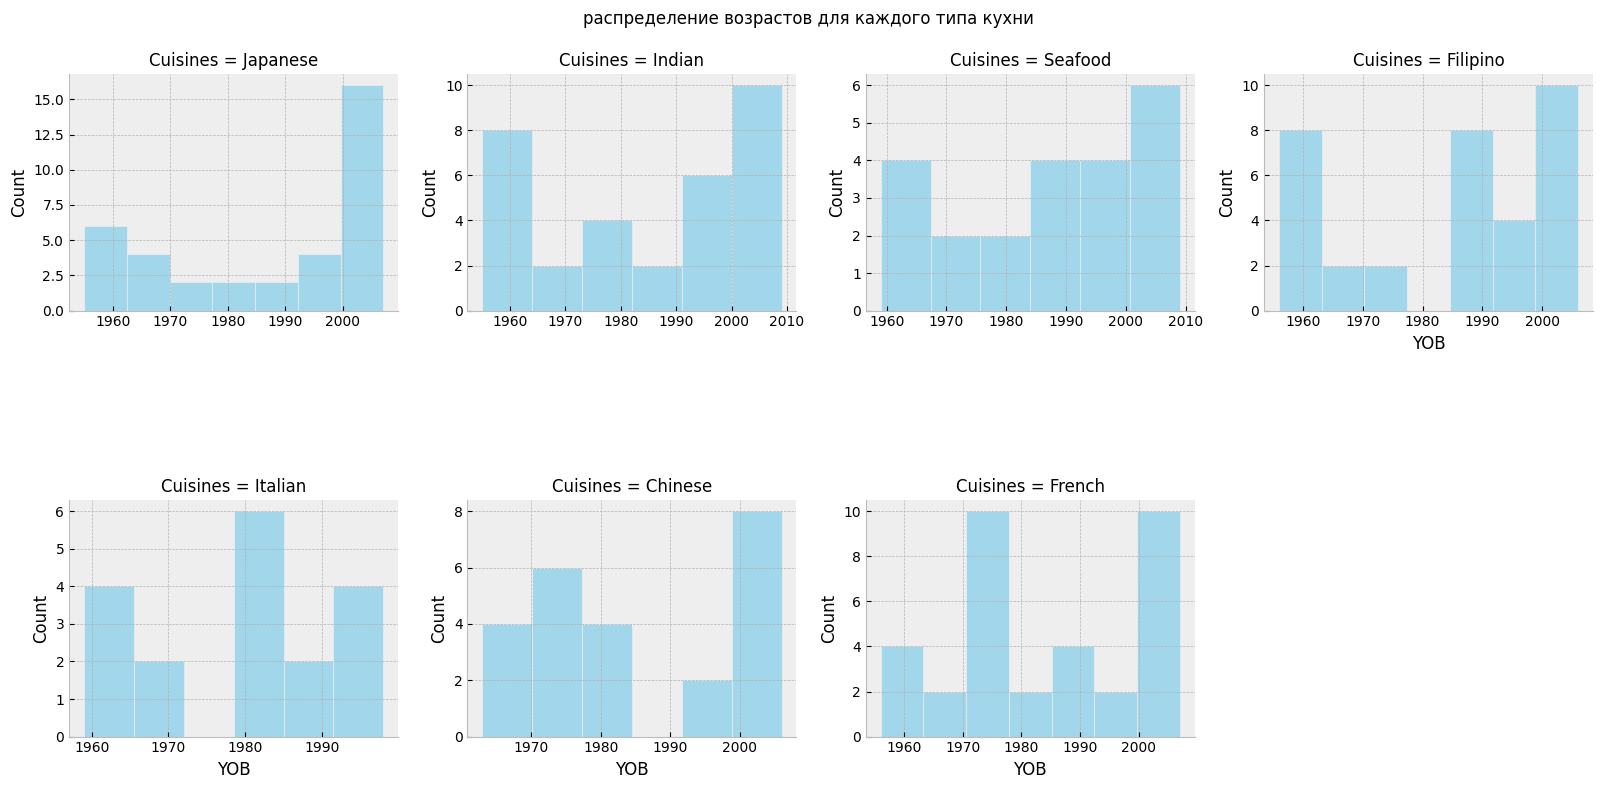

In [11]:
#Сделаем иные графики, чтобы четче видеть какая кухня преобладает у каких возрастов
g = sns.FacetGrid(df, col='Cuisines', col_wrap = 4, height = 4, sharex = False, sharey = False)
g.map(sns.histplot, 'YOB', color='skyblue', kde=False)

g.fig.subplots_adjust(top=0.9, hspace=0.8)
g.fig.suptitle('распределение возрастов для каждого типа кухни')

plt.show()

In [ ]:
#Мы используем One-Hot Encoding для преобразования столбца 'Cuisines' в набор из бинарных столбцов
data_encoding = pd.get_dummies(df, columns=['Cuisines'])#с помощью метода get_dummies преобразуем столбец Cuisines в набор бинарных столбцов с
#префиксом Cuisines_
numeric_data_enc = data_encoding.select_dtypes(include=['float','int', 'bool'])# Исключаем из анализа не преобразованные категориальные признаки

corr_matrix = numeric_data_enc.corr()#создаем матрицу корреляций
cuisine_corr = corr_matrix.filter(like='Cuisines', axis=0)# в матрице корреляций оставляем только строки с префиксом Cuisines_

#вывод cuisine_corr
cuisine_corr

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating,Cuisines_Chinese,Cuisines_Filipino,Cuisines_French,Cuisines_Indian,Cuisines_Italian,Cuisines_Japanese,Cuisines_Seafood
Cuisines_Chinese,-0.012792,-0.028595,-0.014609,0.094018,0.062521,-0.035580,0.015719,1.000000,-0.167122,-0.167122,-0.161165,-0.116131,-0.173013,-0.129823
Cuisines_Filipino,0.035736,-0.049557,-0.006526,-0.046856,-0.165287,0.045296,-0.076027,-0.167122,1.000000,-0.204819,-0.197518,-0.142327,-0.212039,-0.159106
Cuisines_French,0.102597,-0.001042,-0.014464,0.054181,0.023829,-0.094615,-0.051303,-0.167122,-0.204819,1.000000,-0.197518,-0.142327,-0.212039,-0.159106
Cuisines_Indian,-0.015119,0.101554,-0.013470,-0.169264,-0.136028,0.095332,-0.021533,-0.161165,-0.197518,-0.197518,1.000000,-0.137253,-0.204479,-0.153434
Cuisines_Italian,-0.029354,0.014023,-0.090591,0.022048,0.000496,-0.013085,-0.008924,-0.116131,-0.142327,-0.142327,-0.137253,1.000000,-0.147343,-0.110561
Cuisines_Japanese,-0.010820,0.009407,0.071502,0.131635,0.213380,0.031805,0.161964,-0.173013,-0.212039,-0.212039,-0.204479,-0.147343,1.000000,-0.164714
Cuisines_Seafood,-0.094938,-0.052922,0.051217,-0.089913,0.001816,-0.042622,-0.028940,-0.129823,-0.159106,-0.159106,-0.153434,-0.110561,-0.164714,1.000000


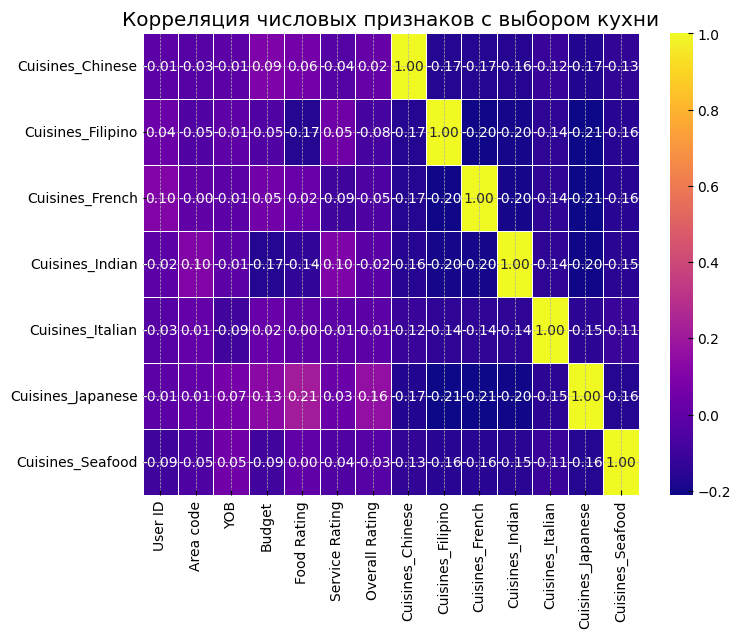

In [13]:
#Построение тепловой карты
plt.figure(figsize=(8,6))
ax = sns.heatmap(data=cuisine_corr, annot=True, cmap='plasma', fmt='.2f', linewidths=0.5)
#ax.xaxis.set_ticks_position('top')
plt.title('Корреляция числовых признаков с выбором кухни')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

depend_category = []

for category in df.select_dtypes(include=['object', 'category']).columns:
    if category != 'Cuisines':
        crosstable = pd.crosstab(df[category], df['Cuisines'])

        chi_2, p_value, dof, expected = chi2_contingency(crosstable)
        print(f'Текущий признак {category}')
        print(f'Chi-squared statistic: {chi_2}')
        print(f'p_value: {p_value}')
        print('\n ________')
        #Проверка независимости
        if p_value < 0.05:
            depend_category.append(category)

print('Список зависимых признаков: \n', depend_category)

Текущий признак Location
Chi-squared statistic: 98.04960279366668
p_value: 2.741810410151911e-05

 ________
Текущий признак Gender
Chi-squared statistic: 14.915625137398841
p_value: 0.020923211248514345

 ________
Текущий признак Marital Status
Chi-squared statistic: 17.939470925791035
p_value: 0.11754079033114026

 ________
Текущий признак Activity
Chi-squared statistic: 7.175616458704694
p_value: 0.304911342509425

 ________
Текущий признак Alcohol 
Chi-squared statistic: 15.584681103640534
p_value: 0.21100722277841943

 ________
Текущий признак Smoker
Chi-squared statistic: 21.69708685864444
p_value: 0.041058345795006446

 ________
Текущий признак Often A S
Chi-squared statistic: 7.78030473770839
p_value: 0.25464468337246643

 ________
Список зависимых признаков: 
 ['Location', 'Gender', 'Smoker']


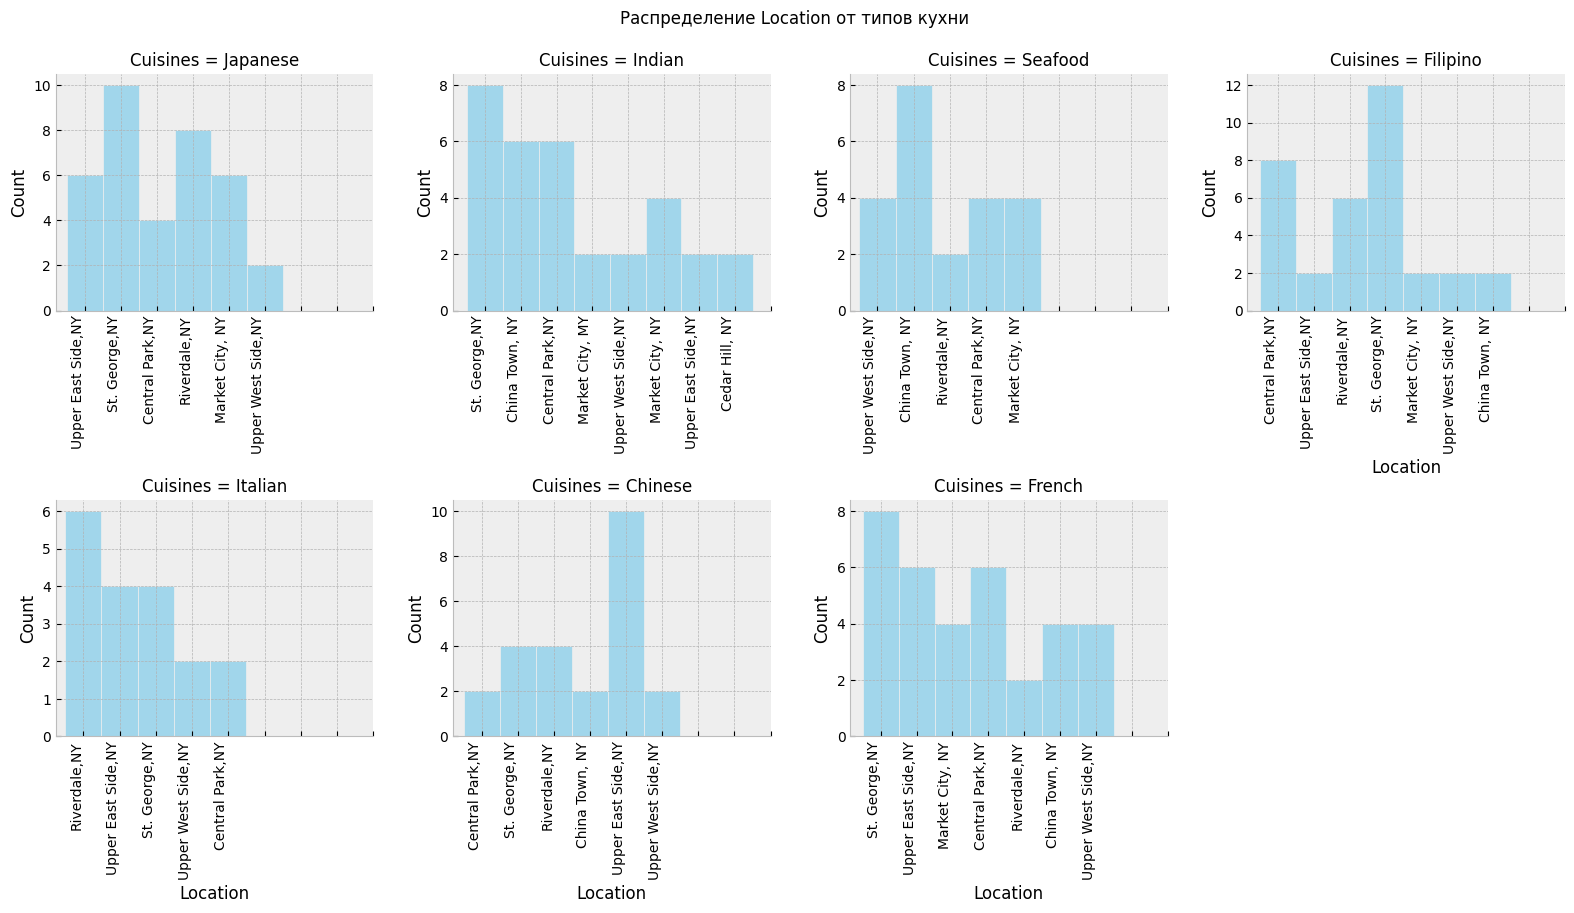

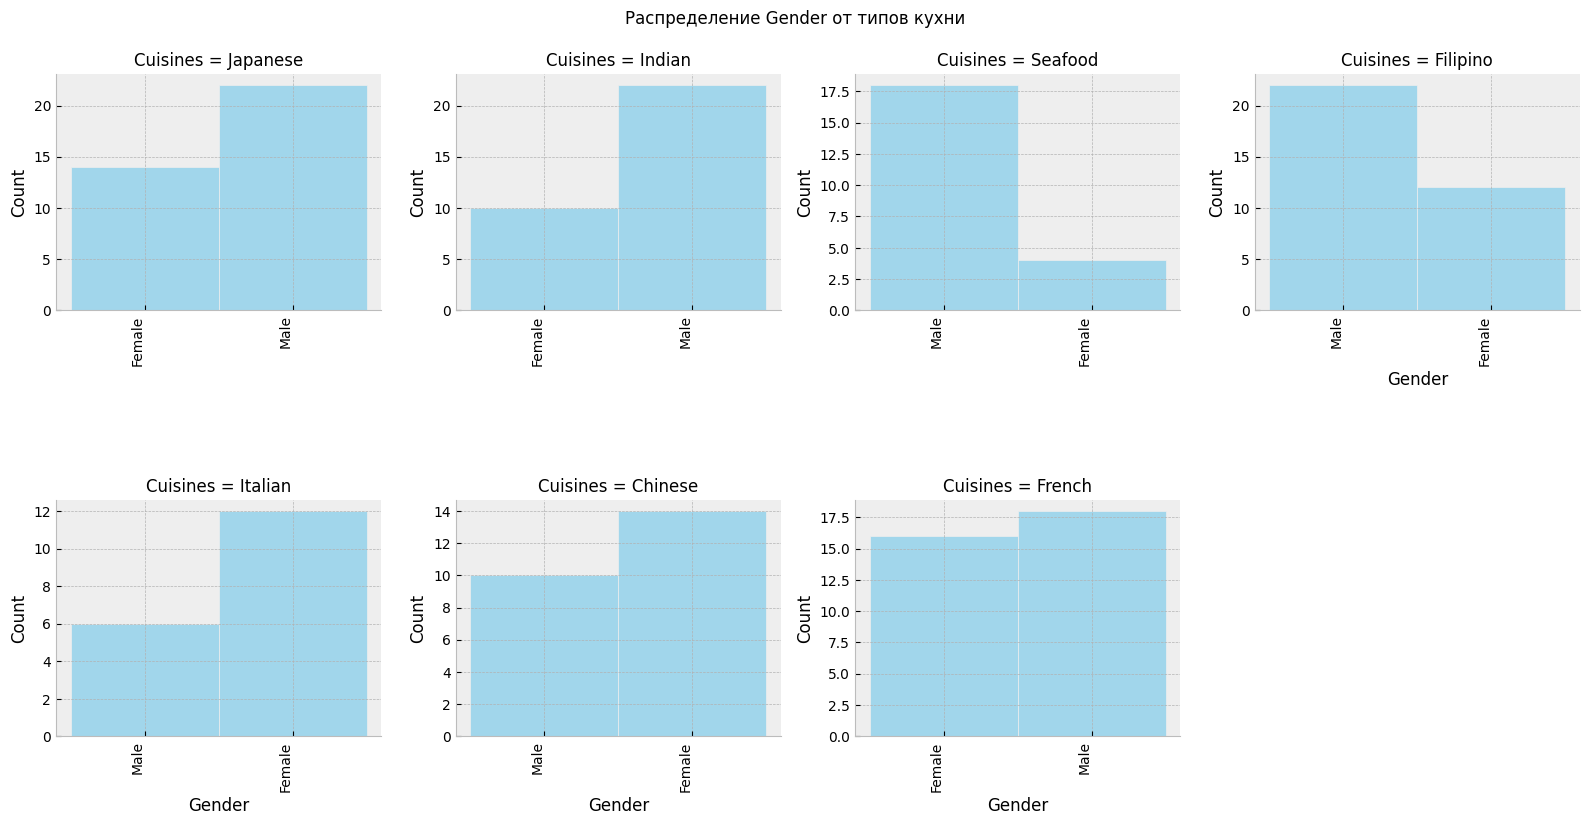

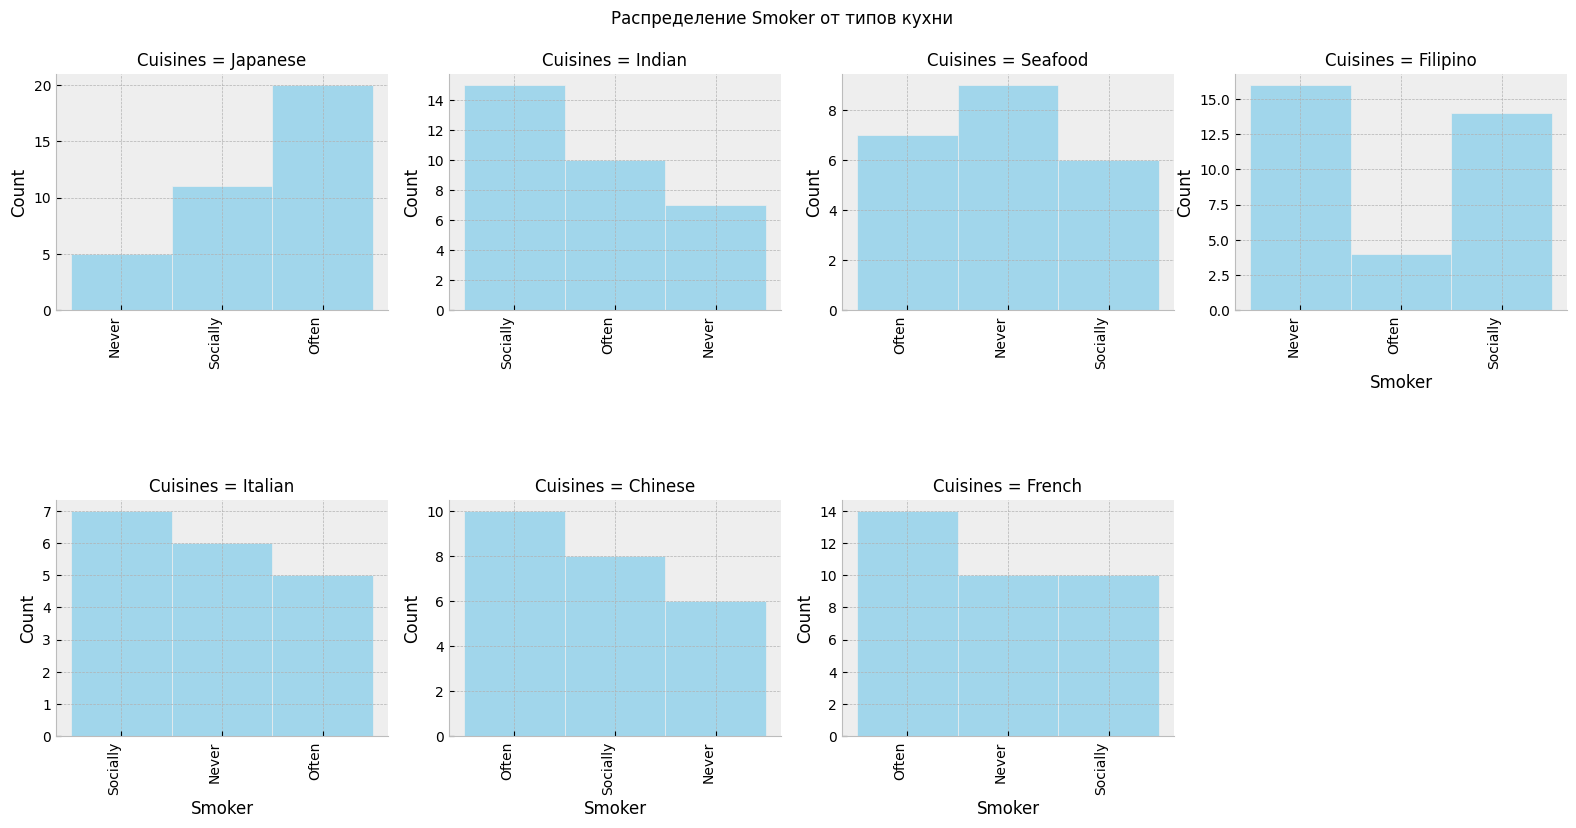

In [ ]:
for category in depend_category:
    g = sns.FacetGrid(df, col='Cuisines', col_wrap = 4, height = 4, sharex = False, sharey = False)
    g.map(sns.histplot, category, color='skyblue', kde=False)
    for ax in g.axes.flat:
        ax.set_xticks(range(len(df[category].unique())))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    g.fig.subplots_adjust(top=0.9, hspace=0.8)
    g.fig.suptitle(f'Распределение {category} от типов кухни')
    plt.show()


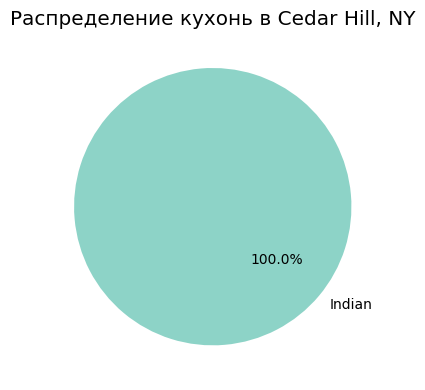

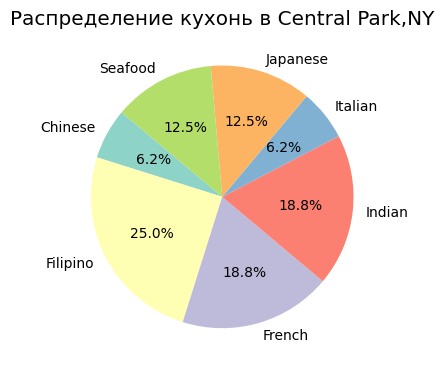

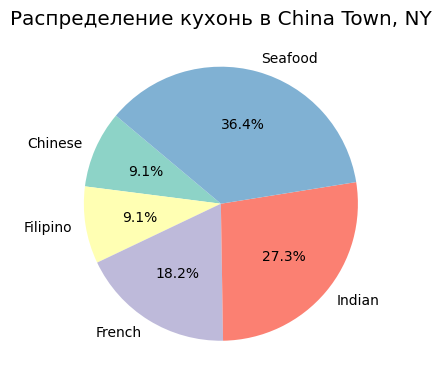

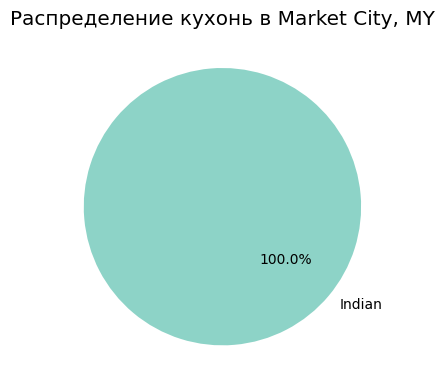

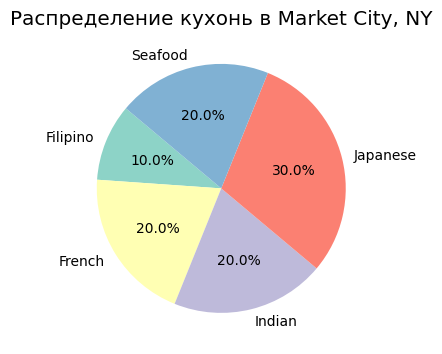

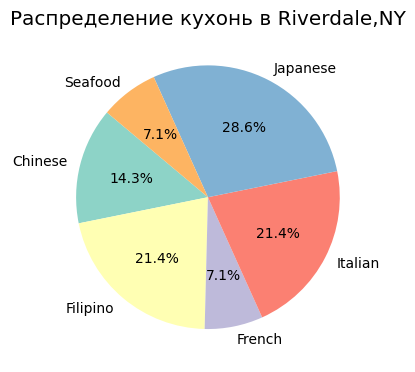

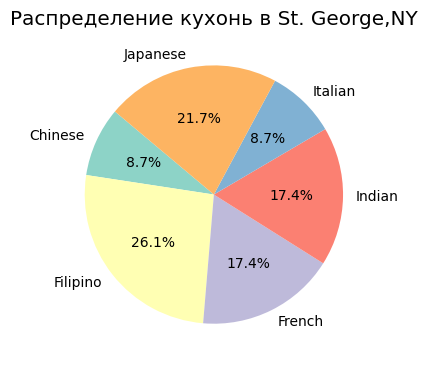

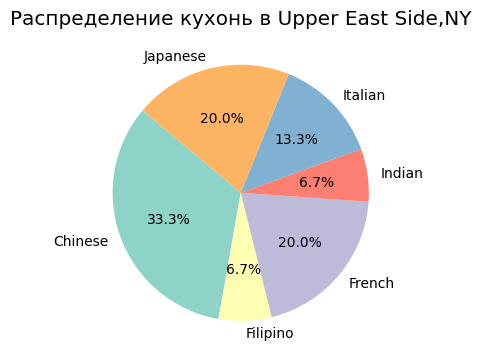

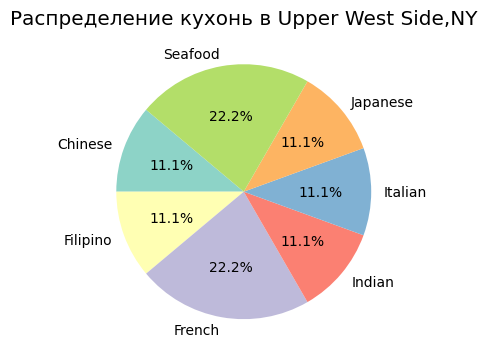

In [ ]:
# Шаг 1: Группировка данных по локациям и подсчет количества кухонь
location_cuisine = df.groupby(['Location', 'Cuisines']).size().reset_index(name='Count')

# Шаг 2: Рассчитываем процентное соотношение в каждой локации
location_cuisine['Percentage'] = location_cuisine.groupby('Location')['Count'].transform(lambda x: x / x.sum() * 100)

# Шаг 3: Строим пироговые диаграммы для каждой локации
locations = location_cuisine['Location'].unique()

# Создаем подграфики для каждой локации


for location in locations:
    # Создаем отдельную фигуру для каждой локации
    plt.figure(figsize=(4, 4))  # Размер графика
    subset = location_cuisine[location_cuisine['Location'] == location]

    # Строим пироговую диаграмму
    plt.pie(
        subset['Percentage'],
        labels=subset['Cuisines'],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Set3.colors  # Цветовая палитра
    )
    plt.title(f'Распределение кухонь в {location}')  # Заголовок для каждого графика

    plt.tight_layout()  # Корректируем отступы
    plt.show()  # Отображаем текущий график
